# 🎯Blinkit Grocery Sales Analysis & Next-Month Demand Prediction

## 📌 Problem Statement

    Blinkit wants to predict sales demand to:

    - Avoid stock-outs

    - Reduce wastage

    - Improve outlet performance

    - Optimize inventory

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Overview


The dataset contains grocery sales data from Blinkit, including product details, outlet characteristics, and sales figures.

- Total rows represent individual product-outlet combinations
- The dataset includes both numerical and categorical features
- Sales data will be used as the target variable for prediction


In [68]:
df = pd.read_csv("Blinkit.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2. Data Cleaning & Preparation

Missing values were handled to ensure model stability.  
Duplicate records were removed to avoid biased analysis.

This step ensures the dataset is clean and suitable for analysis and modeling.


In [70]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

df.fillna(0, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 3. Exploratory Data Analysis (EDA)

EDA is performed to understand sales patterns across products and outlets and identify key drivers of revenue.



df.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)


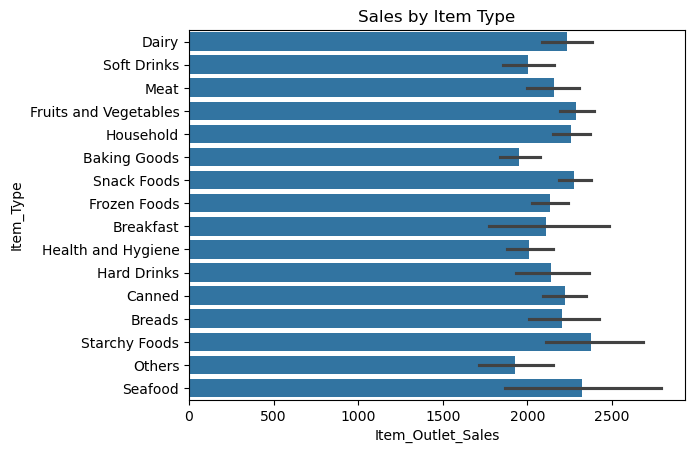

In [71]:
sns.barplot(
    x="Item_Outlet_Sales",
    y="Item_Type",
    data=df
)
plt.title("Sales by Item Type")
plt.show()

**Insight:**  
Fruits & Vegetables and Snack Foods generate the highest sales, indicating strong and consistent demand in these categories.


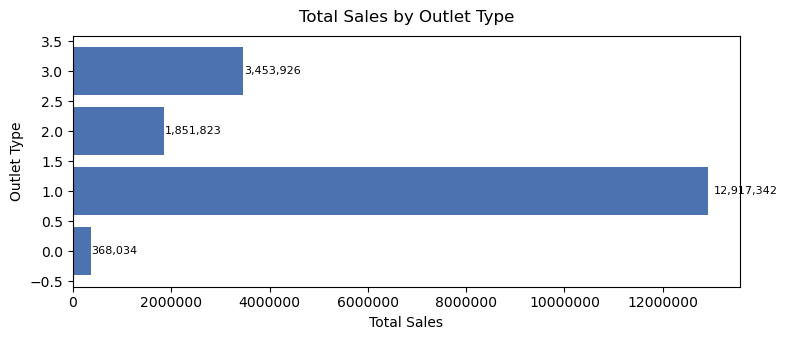

In [90]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.barh(outlet_sales.index, outlet_sales.values, color="#4C72B0")
ax.set_title(
    "Total Sales by Outlet Type",
    fontsize=12,
    pad=10
)
ax.set_xlabel("Total Sales", fontsize=10)
ax.set_ylabel("Outlet Type", fontsize=10)
ax.ticklabel_format(style='plain', axis='x')
for i, v in enumerate(outlet_sales.values):
    ax.text(v * 1.01, i, f"{v:,.0f}", va="center", fontsize=8)
plt.tight_layout()
plt.show()

**Explanation:**  
Outlet Type represents different store formats used by Blinkit. Supermarket Type1 dominates total sales, indicating higher customer reach and product availability compared to other formats.


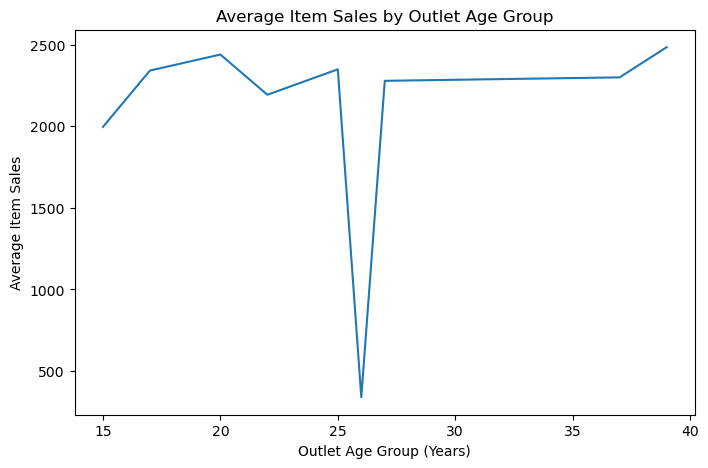

In [91]:
age_sales = df.groupby("Outlet_Age")["Item_Outlet_Sales"].mean()
plt.figure(figsize=(8,5))
plt.plot(age_sales.index, age_sales.values)
plt.title("Average Item Sales by Outlet Age Group")
plt.xlabel("Outlet Age Group (Years)")
plt.ylabel("Average Item Sales")
plt.show()

**Insight:**  
Older outlets tend to show more stable average sales, suggesting that outlet maturity positively influences customer trust and consistent demand.


## 4. SQL-Based Business Insights

SQL queries were executed in MySQL to analyze sales by item type, outlet type, and location.  
These queries help answer core business questions related to outlet performance and demand distribution.


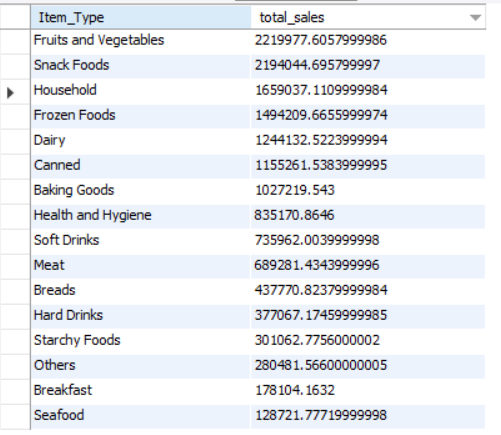

## 5. Feature Engineering

New features were created to improve model learning:
- Outlet age was derived from establishment year
- Monthly sales was estimated to enable future demand prediction


In [74]:
df['Outlet_Age'] = 2024 - df['Outlet_Establishment_Year']
df['Monthly_Sales'] = df['Item_Outlet_Sales'] / 12

In [76]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Monthly_Sales,Next_Month_Sales
0,623,9.30,1,0.016047,10,249.8092,9,1999,2,0,1,3735.1380,25,311.261500,342.983746
1,1337,5.92,2,0.019278,6,48.2692,3,2009,2,2,2,443.4228,15,36.951900,81.770794
2,1185,17.50,1,0.016760,2,141.6180,9,1999,2,0,1,2097.2700,25,174.772500,217.329764
3,138,19.20,2,0.000000,12,182.0950,0,1998,0,2,0,732.3800,26,61.031667,144.505253
4,332,8.93,1,0.000000,15,53.8614,1,1987,1,2,1,994.7052,37,82.892100,45.752804


## 6. Machine Learning Model

A regression model is built to predict next-month sales using product and outlet attributes.


In [92]:
from sklearn.model_selection import train_test_split
X = df.drop(["Monthly_Sales","Item_Outlet_Sales"], axis=1)
y = df["Monthly_Sales"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 7. Model Evaluation

The model performance is evaluated using:
- Mean Absolute Error (MAE)
- R² Score (coefficient of determination)


In [116]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [117]:
from sklearn.metrics import mean_absolute_error, r2_score
y_test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Absolute Error (MAE): 70.56578185835276
R² Score: 0.5336608983118079


**Interpretation:**

- MAE shows the average difference between actual and predicted monthly sales.
- R² score indicates how well the model explains the variance in sales data.
- A higher R² value means better predictive performance.


In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [120]:
X_scaled = scaler.transform(X)
df['Next_Month_Sales'] = model.predict(X_scaled)
df[['Next_Month_Sales']].head()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Monthly_Sales,Next_Month_Sales
0,623,9.30,1,0.016047,10,249.8092,9,1999,2,0,1,3735.1380,25,311.261500,343.531726
1,1337,5.92,2,0.019278,6,48.2692,3,2009,2,2,2,443.4228,15,36.951900,80.982133
2,1185,17.50,1,0.016760,2,141.6180,9,1999,2,0,1,2097.2700,25,174.772500,216.965889
3,138,19.20,2,0.000000,12,182.0950,0,1998,0,2,0,732.3800,26,61.031667,145.389781
4,332,8.93,1,0.000000,15,53.8614,1,1987,1,2,1,994.7052,37,82.892100,45.851515


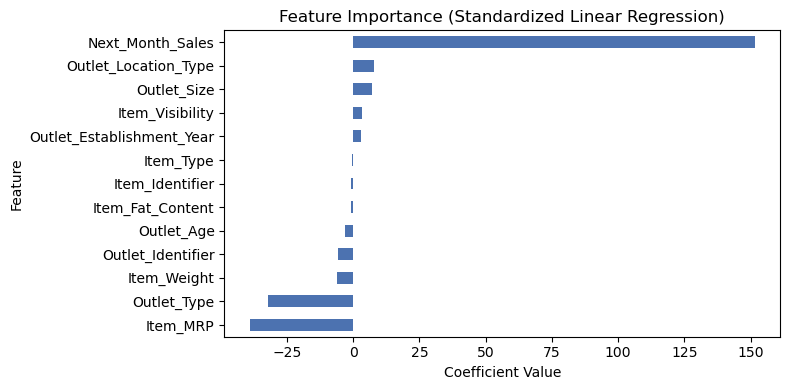

In [97]:
importance = pd.Series(
    model.coef_,
    index=X.columns
).sort_values()
plt.figure(figsize=(8, 4))
importance.plot(kind="barh", color="#4C72B0")
plt.title("Feature Importance (Standardized Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Insight:**  
Item price, outlet type, and outlet age are the strongest drivers of sales.


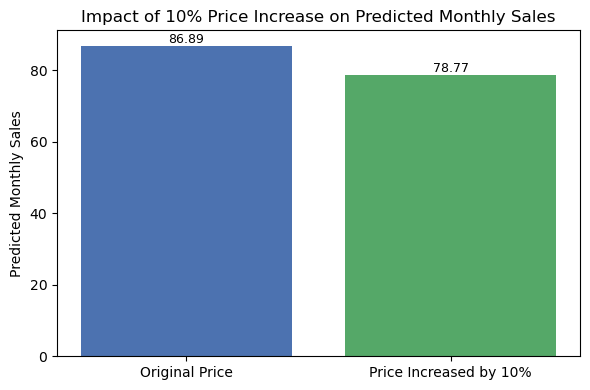

In [98]:
import matplotlib.pyplot as plt
predictions = [base_prediction, new_prediction]
labels = ["Original Price", "Price Increased by 10%"]
plt.figure(figsize=(6,4), dpi=100)
bars = plt.bar(labels, predictions, color=["#4C72B0", "#55A868"])
plt.title("Impact of 10% Price Increase on Predicted Monthly Sales", fontsize=12)
plt.ylabel("Predicted Monthly Sales", fontsize=10)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )
plt.tight_layout()
plt.show()

**Scenario Analysis:**  
A simulated increase in item price shows how sensitive predicted sales are to pricing changes, helping support pricing decisions.


## 8. Business Recommendations

- Prioritize inventory for high-performing categories
- Focus on supermarket outlets for expansion
- Use demand predictions to reduce wastage and stock-outs
- Monitor younger outlets for growth opportunities


## Conclusion

This project demonstrates an end-to-end analytics and machine learning workflow, converting raw sales data into actionable business insights.
